# May 28, 2019
## mnist_review
### 2018020143 민정원

## 1.  필요한 모듈 불러오기

In [2]:
# TensorFlow and tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## 2. train, test set 만들고 mnist 데이터 받기 

In [3]:
(x_train, y_train),(x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### 2.1 데이터 꼴 

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
print(x_train.ndim)
print(x_test.ndim)

3
3


In [6]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [8]:
print(y_train.ndim)
print(y_test.ndim)

1
1


## 3. x_train 미리보기

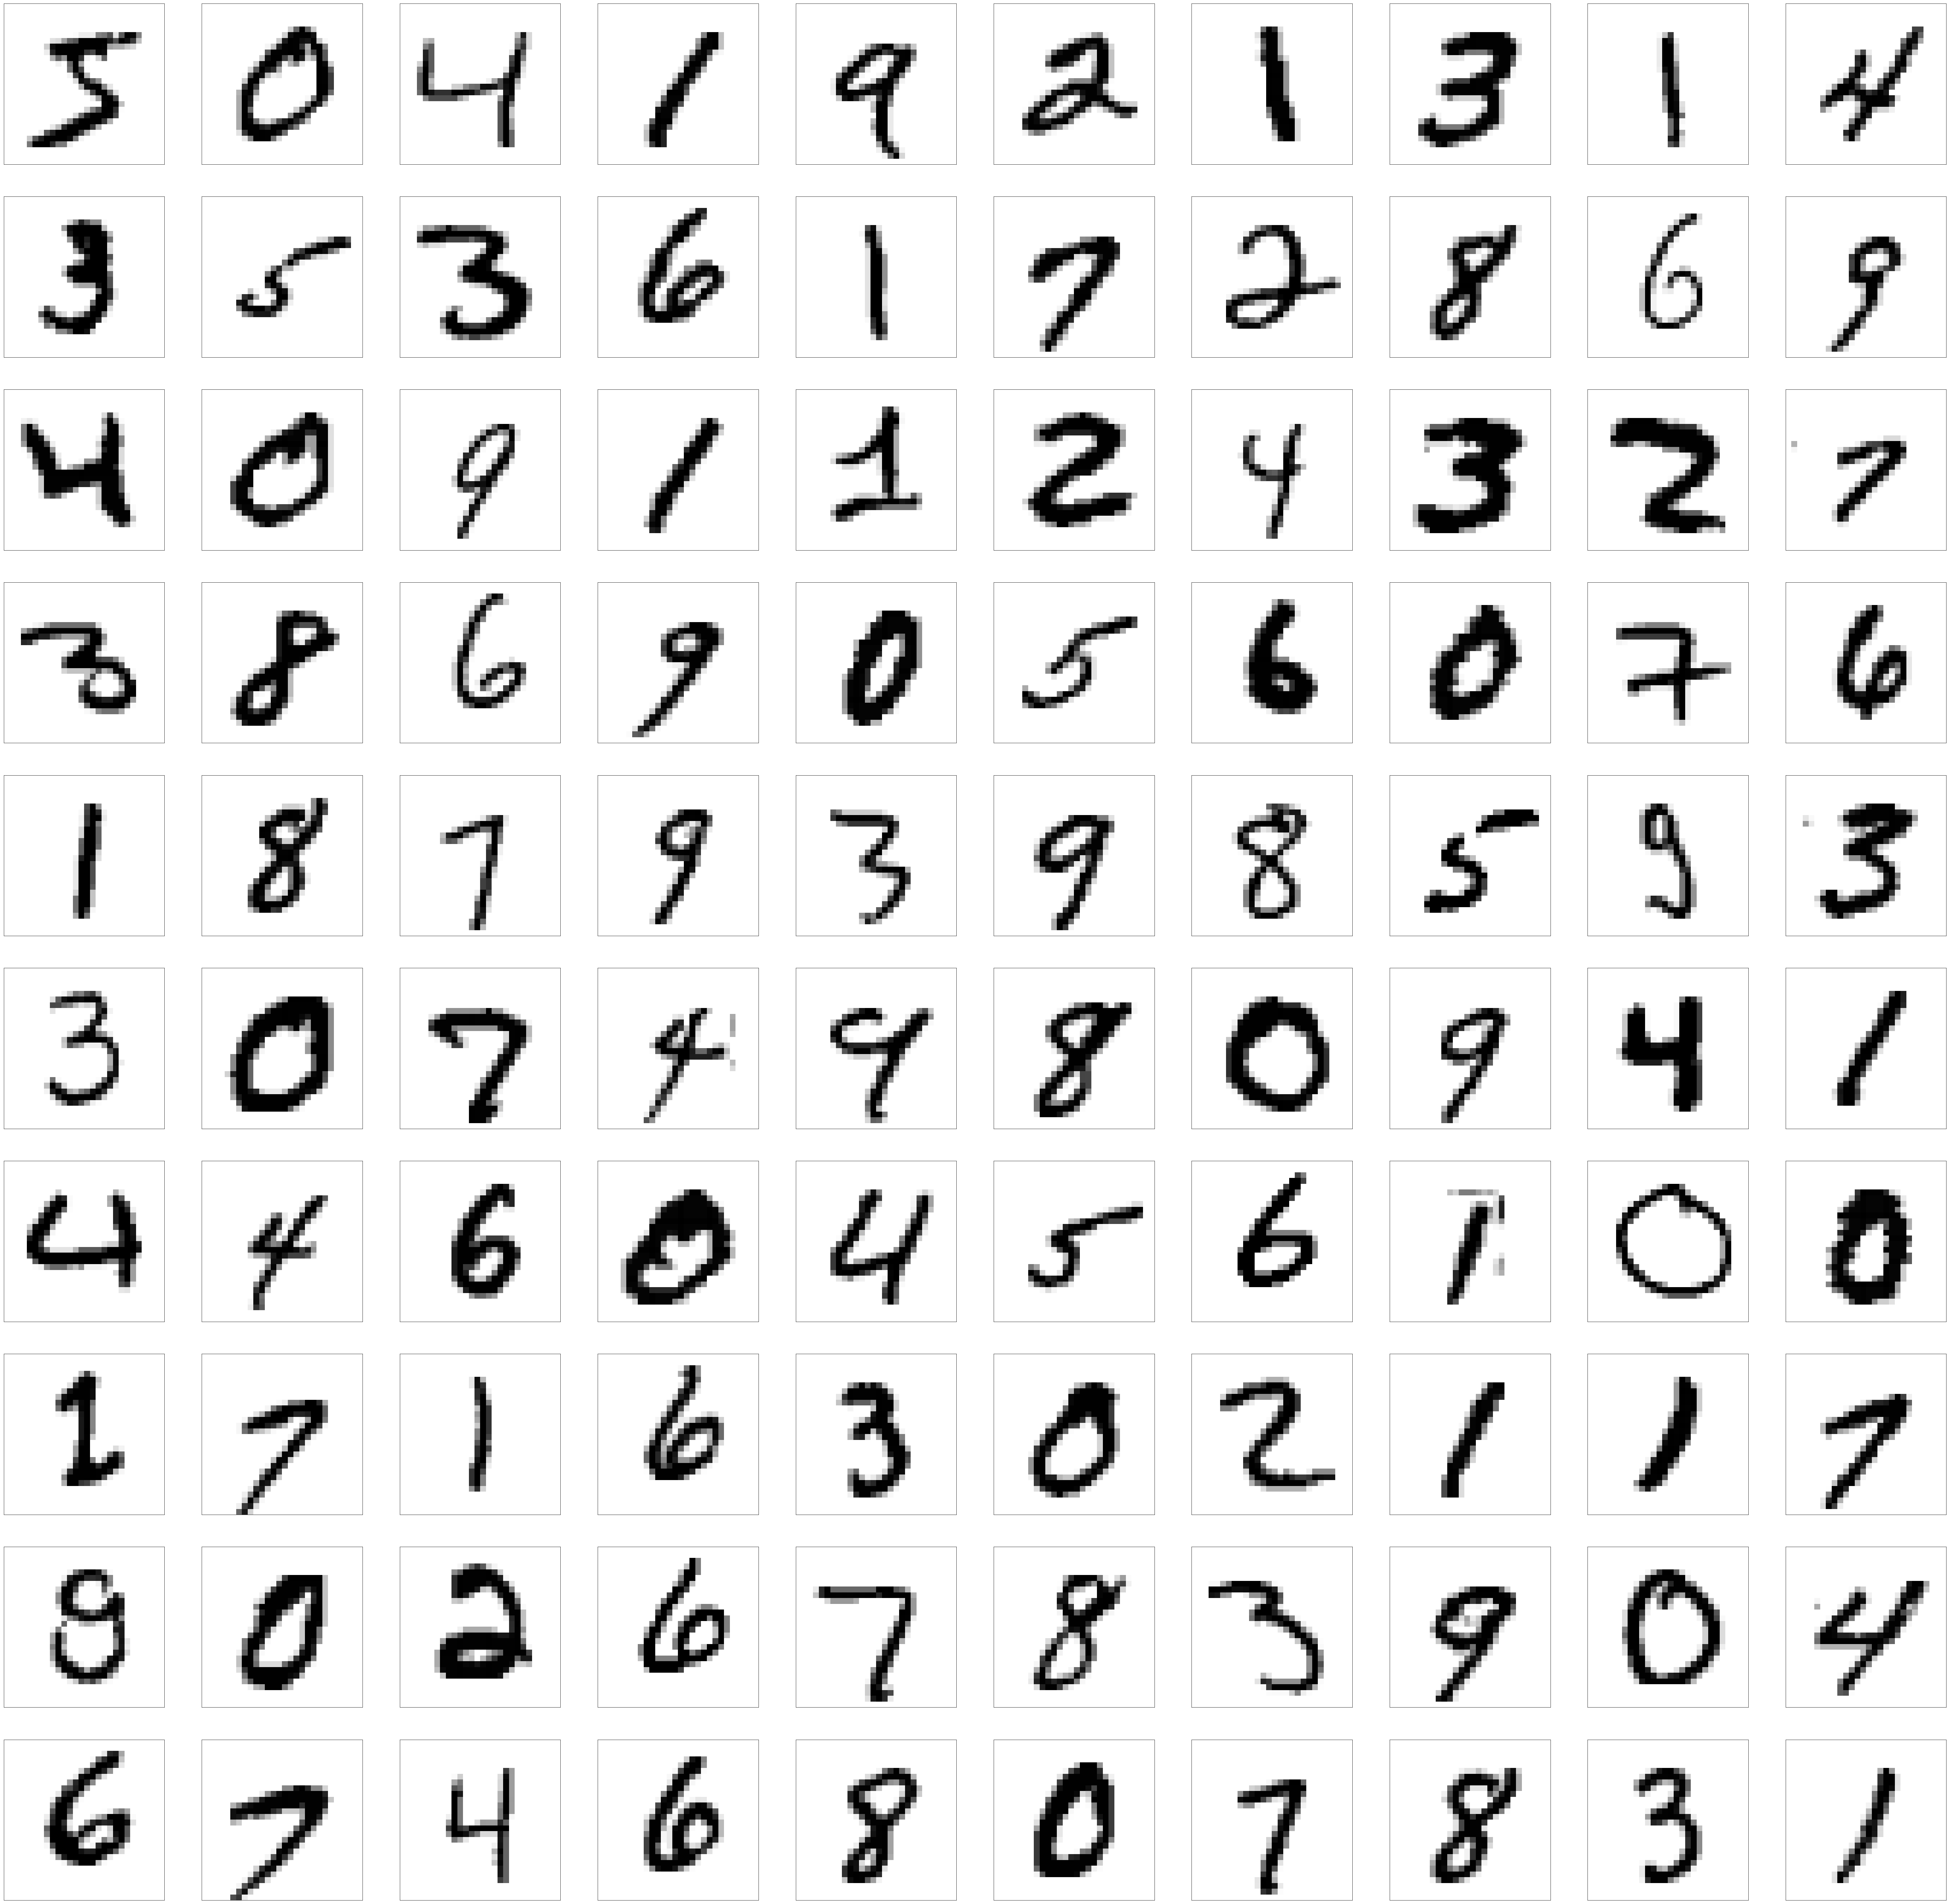

In [9]:
plt.figure(figsize=(100,100)) # size of figure
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

## 4. 모델 만들기

In [10]:
img_rows = 28
img_cols = 28

# 1. 모델 선언
model = Sequential()
# 2. flatten : 28*28을 vector로 바꾸어 줌, input shape = 28,28
model.add(Flatten(input_shape=(img_rows, img_cols)))
# 3. hidden shape 만들기, node = 512개, nonlinearity = relu
model.add(Dense(512, activation='relu'))
# 4. output node 10개, nonlinearity = softmax
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 5. optimizer : Adam, lr : 0.001

In [14]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


## 6. fit
batch_size = 32 : default, 위의 (None, 28,28)에서 None에서 다뤄지는 size, 한 번에 몇 개를 연산할 것인가        
validation split = 0.2 : x_train에서 20%를 validation set로 설정한 것(원래는 train, validation, test 세 set을 만들어야하는데 그렇게 하지 않았으므로 이 단계에서 설정해줌)     
epoch를 몇으로 할 것인지 판단해볼 수 있는 단계(overfit, underfit이 되지 않는 지점)

In [24]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 160us/sample - loss: 0.0083 - acc: 0.9974 - val_loss: 0.1193 - val_acc: 0.9750
Epoch 2/10
48000/48000 [==============================] - 8s 164us/sample - loss: 0.0087 - acc: 0.9973 - val_loss: 0.0989 - val_acc: 0.9803
Epoch 3/10
48000/48000 [==============================] - 8s 168us/sample - loss: 0.0096 - acc: 0.9968 - val_loss: 0.1102 - val_acc: 0.9774
Epoch 4/10
48000/48000 [==============================] - 8s 173us/sample - loss: 0.0090 - acc: 0.9970 - val_loss: 0.1111 - val_acc: 0.9784
Epoch 5/10
48000/48000 [==============================] - 8s 174us/sample - loss: 0.0071 - acc: 0.9975 - val_loss: 0.1120 - val_acc: 0.9786
Epoch 6/10
48000/48000 [==============================] - 8s 172us/sample - loss: 0.0055 - acc: 0.9983 - val_loss: 0.1115 - val_acc: 0.9782
Epoch 7/10
48000/48000 [==============================] - 8s 171us/sample - loss: 0.0077 - acc: 0.9973 - val_l

## 7. 각 epoch마다 validation set의 accuracy와 loss 기록

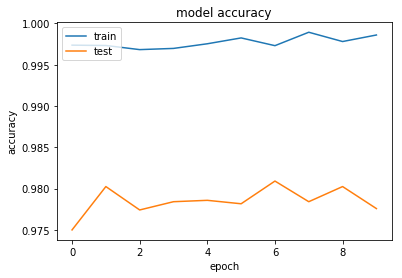

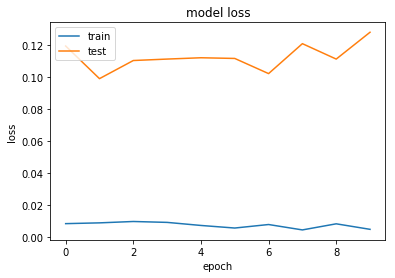

In [26]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

위의 test는 validation set를 의미        
train과 validation의 accuracy가 모두 향상되는 구간 : underfit      
train의 accuracy는 계속 향상되지만 validation의 accuracy는 하락하는 구간 : overfit, model이 train에서는 work하지만 새로운 data에서는 work하지 않는다     
underfit에서 overfit으로 가는 지점 : fit된 상태

## 7. evaluate

In [42]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.1332 - acc: 0.9724


[0.13324685952800355, 0.9724]

In [27]:
from IPython.display import HTML

In [28]:
input_form = """

<table>

<td style="border-style: none;">

<div style="border: solid 2px #666; width: 143px; height: 144px;">

<canvas width="140" height="140"></canvas>

</div></td>

<td style="border-style: none;">

<button onclick="clear_value()">Clear</button>

</td>

</table>

"""



javascript = """

<script type="text/Javascript">

    var pixels = [];

    for (var i = 0; i < 28*28; i++) pixels[i] = 0

    var click = 0;



    var canvas = document.querySelector("canvas");

    canvas.addEventListener("mousemove", function(e){

        if (e.buttons == 1) {

            click = 1;

            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";

            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);

            x = Math.floor(e.offsetY * 0.2)

            y = Math.floor(e.offsetX * 0.2) + 1

            for (var dy = 0; dy < 2; dy++){

                for (var dx = 0; dx < 2; dx++){

                    if ((x + dx < 28) && (y + dy < 28)){

                        pixels[(y+dy)+(x+dx)*28] = 1

                    }

                }

            }

        } else {

            if (click == 1) set_value()

            click = 0;

        }

    });

    

    function set_value(){

        var result = ""

        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","

        var kernel = IPython.notebook.kernel;

        kernel.execute("image = [" + result + "]");

    }

    

    function clear_value(){

        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";

        canvas.getContext("2d").fillRect(0, 0, 140, 140);

        for (var i = 0; i < 28*28; i++) pixels[i] = 0

    }

</script>

"""

In [32]:
HTML(input_form + javascript)

In [33]:
len(image)

784

<BarContainer object of 10 artists>

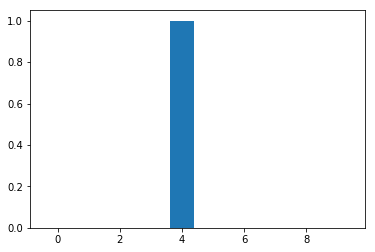

In [34]:
image_3darray = np.array(image).reshape([1,img_rows,img_cols])
result = model.predict(image_3darray)
plt.bar(list(range(10)), list(result.reshape([10])))